In [1]:
#Github Machine-Learning-in-Action

In [2]:
#1.k-NN算法实践

(6, 2)
[[  3 104]
 [  2 100]
 [  1  81]
 [101  10]
 [ 99   5]
 [ 98   2]]
['爱情片', '爱情片', '爱情片', '动作片', '动作片', '动作片']


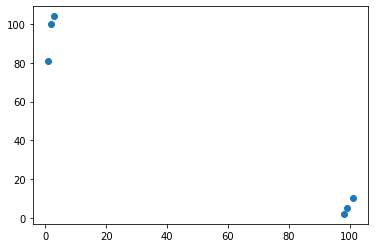

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


"""
Parameters:
    无
Returns:
    group - 数据集
    labels - 分类标签
"""
# 函数说明:创建数据集
def createDataSet():
    #六组二维特征 每个电影包含两个维度的数据 第一个维度数据是打头镜头 第二个维度数据是接吻镜头
    group = np.array([[3,104],[2,100],[1,81],[101,10],[99,5],[98,2]])
    #六组特征的标签
    labels = ['爱情片','爱情片','爱情片','动作片','动作片','动作片']
    return group, labels

def showDataSet(dataMat, labelMat):
    data_plus = []
    for i in range(len(group)):
        data_plus.append(dataMat[i])
    data_plus_np = np.array(data_plus)# 转换为numpy矩阵
    #transpose专置后第一行是打斗镜头 第二行是接吻镜头
    plt.scatter(np.transpose(data_plus_np)[0],np.transpose(data_plus_np)[1])#散点图
    plt.show()


#创建数据集
group, labels = createDataSet()
#打印数据集
print(group.shape)
print(group)
print(labels)
showDataSet(group,labels)

In [5]:
import operator
# k-近邻算法的一般流程
# (1) 收集数据：可以使用任何方法。
# (2) 准备数据：距离计算所需要的数值，最好是结构化的数据格式。
# (3) 分析数据：可以使用任何方法。
# (4) 训练算法：此步骤不适用于k-近邻算法。
# (5) 测试算法：计算错误率。
# (6) 使用算法：首先需要输入样本数据和结构化的输出结果
#     然后运行k-近邻算法判定输入数据分别属于哪个分类，最后应用对计算出的分类执行后续的处理。

"""
Parameters:
    inX - 用于分类的数据(测试集)
    dataSet - 用于训练的数据(训练集)
    labes - 分类标签
    k - kNN算法参数,选择距离最小的k个点
Returns:
    sortedClassCount[0][0] - 分类结果
"""
# 函数说明:kNN算法,分类器
def classify0(inX, dataSet, labels, k):
    #numpy函数shape[0]返回dataSet的行数
    dataSetSize = dataSet.shape[0]
    #在列向量方向上重复inX共1次(横向)，行向量方向上重复inX共dataSetSize次(纵向)
    print(np.tile(inX, (dataSetSize, 1))) #tile是将数据沿着x轴和y轴扩充 这里是为了把inX测试数据扩大成和训练集一样的size
    #方便计算欧拉距离 也就是[a,b]的数据要复制N行 N是训练集的行数 列不用 因为大家的特征数据维度默认是一样的
    print(dataSet)#验证一下即可 tile后与训练集的数据size一致
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet #减去训练集 计算欧式距离 但是还差平方和求和
    #二维特征相减后平方
    sqDiffMat = diffMat**2 #平方后还差相加 相加是同一行进行
    #sum()所有元素相加，sum(0)列相加，sum(1)行相加
    print(sqDiffMat)
    sqDistances = sqDiffMat.sum(axis=1) #axis=0 沿着行的方向 最后只剩下一行 axis=1 沿着列的方向 最后只剩下一列
    print(sqDistances) #验证下即可
    #开方，计算出距离
    distances = sqDistances**0.5
    print(distances) #验证下即可
    #返回distances中元素从小到大排序后的索引值
    sortedDistIndices = distances.argsort()
    print(sortedDistIndices)
    #定一个记录类别次数的字典
    classCount = {}
    for i in range(k):
        #取出前k个元素的类别
        voteIlabel = labels[sortedDistIndices[i]] #爱情或者动作
        #dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        #计算类别次数
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1 #累加爱情或动作的出现次数
        print(classCount[voteIlabel])
    #python3中用items()替换python2中的iteritems()
    #key=operator.itemgetter(1)根据字典的值进行排序
    #key=operator.itemgetter(0)根据字典的键进行排序
    #reverse降序排序字典
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    #返回次数最多的类别,即所要分类的类别
    print(sortedClassCount[0][0],sortedClassCount[0][1])
    return sortedClassCount[0][0]


#创建数据集
group, labels = createDataSet()
#测试集
test = [101,20]
test1= [21,129]
#kNN分类
test_class = classify0(test, group, labels, 3)
#打印分类结果
print(test_class)
test_class1 = classify0(test1, group, labels, 3)
print(test_class1)

[[101  20]
 [101  20]
 [101  20]
 [101  20]
 [101  20]
 [101  20]]
[[  3 104]
 [  2 100]
 [  1  81]
 [101  10]
 [ 99   5]
 [ 98   2]]
[[ 9604  7056]
 [ 9801  6400]
 [10000  3721]
 [    0   100]
 [    4   225]
 [    9   324]]
[16660 16201 13721   100   229   333]
[129.0736224  127.28314892 117.13667231  10.          15.13274595
  18.24828759]
[3 4 5 2 1 0]
1
2
3
动作片 3
动作片
[[ 21 129]
 [ 21 129]
 [ 21 129]
 [ 21 129]
 [ 21 129]
 [ 21 129]]
[[  3 104]
 [  2 100]
 [  1  81]
 [101  10]
 [ 99   5]
 [ 98   2]]
[[  324   625]
 [  361   841]
 [  400  2304]
 [ 6400 14161]
 [ 6084 15376]
 [ 5929 16129]]
[  949  1202  2704 20561 21460 22058]
[ 30.8058436   34.66987165  52.         143.39107364 146.49232062
 148.51935901]
[0 1 2 3 4 5]
1
2
3
爱情片 3
爱情片


In [6]:
#分类器并不会得到百分百正确的结果，我们可以使用多种方法检测分类器的正确率
#此外分类器的性能也会受到多种因素的影响，如分类器设置和数据集等。除此之外，不同的算法在不同数据集上的表现可能完全不同
#k-近邻算法没有进行数据的训练，直接使用未知的数据与已知的数据进行比较，得到结果。因此，可以说k-邻近算法不具有显式的学习过程

# 在约会网站上使用k-近邻算法
# (1) 收集数据：提供文本文件。
# (2) 准备数据：使用Python解析文本文件。
# (3) 分析数据：使用Matplotlib画二维扩散图。
# (4) 训练算法：此步骤不适用于k-近邻算法。
# (5) 测试算法：使用海伦提供的部分数据作为测试样本。测试样本和非测试样本的区别在于
#     测试样本是已经完成分类的数据，如果预测分类与实际类别不同，则标记为一个错误。
# (6) 使用算法：产生简单的命令行程序，然后海伦可以输入一些特征数据以判断对方是否为自己喜欢的类型

# 我的朋友海伦就是这样一个人，她一直使用在线约会网站寻找适合自己的约会对象
# 但是她发现尽管约会网站会推荐不同的人选，但并不是每一个人她都喜欢
# 经过一番总结，她发现曾交往过三种类型的人：不喜欢的人、魅力一般的人和极具魅力的人
# 她希望我们的分类软件可以更好地帮助她将匹配对象划分到确切的分类中
# 此外，海伦自己还收集了一些约会网站未曾记录的数据信息，她认为这些数据更有助于匹配对象的归类
# 海伦收集约会数据已经有了一段时间，她把这些数据存放在文本文件datingTestSet.txt中
# 每个样本数据占据一行，总共有1000行。海伦的样本主要包含以下3种特征：
# 每年获得的飞行常客里程数
# 玩视频游戏所耗时间百分比
# 每周消费的冰淇淋公升数
# 观察数据，可以看到有largeDoses、smallDoses、didntLike三类标记

In [12]:
# 在将上述特征数据输入到分类器前，必须将待处理的数据的格式改变为分类器可以接收的格式
# 分类器接收的数据是什么格式的？从前面讲的你已经知道，要将数据分类两部分，即 特征矩阵 和对应的 分类标签 向量
# 在kNN.py中创建名为file2matrix的函数，以此来处理输入格式问题。该函数的输入为文件名字符串，输出为 训练样本矩阵 和 类标签向量
"""
Parameters:
    filename - 文件名
Returns:
    returnMat - 特征矩阵
    classLabelVector - 分类Label向量
"""
# 函数说明:打开并解析文件，对数据进行分类：1代表不喜欢,2代表魅力一般,3代表极具魅力
def file2matrix(filename):
    #打开文件
    fr = open(filename)
    #读取文件所有内容
    arrayOLines = fr.readlines()
    #得到文件行数
    numberOfLines = len(arrayOLines)
    #返回的NumPy矩阵,解析完成的数据:numberOfLines行,3列
    returnMat = np.zeros((numberOfLines,3))
    #返回的分类标签向量
    classLabelVector = []
    #行的索引值
    index = 0
    for line in arrayOLines:
        #s.strip(rm)，当rm空时,默认删除空白符(包括'\n','\r','\t',' ')
        line = line.strip() #该方法只能删除开头或是结尾的字符，不能删除中间部分的字符
        #使用s.split(str="",num=string,cout(str))将字符串根据'\t'分隔符进行切片。
        listFromLine = line.split('\t')
        #将数据前三列提取出来,存放到returnMat的NumPy矩阵中,也就是特征矩阵
        returnMat[index,:] = listFromLine[0:3] #存放3列数据 分别是里程数 游戏时间占比 每周冰淇淋消耗公升数
        #根据文本中标记的喜欢的程度进行分类,1代表不喜欢,2代表魅力一般,3代表极具魅力
        if listFromLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
    return returnMat, classLabelVector



#打开的文件名
filename = "datingTestSet.txt"
#打开并处理数据
datingDataMat, datingLabels = file2matrix(filename)
print(datingDataMat[0:5])#前5行数据
print(datingLabels[0:5])#前5行数据对应的分类

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 [7.5136000e+04 1.3147394e+01 4.2896400e-01]
 [3.8344000e+04 1.6697880e+00 1.3429600e-01]]
[3, 2, 1, 1, 1]


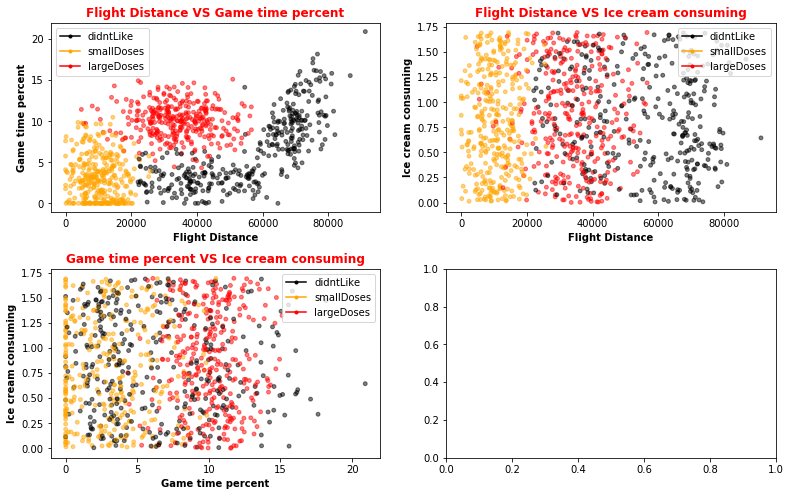

In [28]:
import matplotlib.lines as mlines

"""
Parameters:
    datingDataMat - 特征矩阵
    datingLabels - 分类Label
Returns:
    无
"""
# 函数说明:可视化数据
def showdatas(datingDataMat, datingLabels):
    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
    fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(13,8))

    numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')
    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0][0].set_title(u'Flight Distance VS Game time percent')
    axs0_xlabel_text = axs[0][0].set_xlabel(u'Flight Distance')
    axs0_ylabel_text = axs[0][0].set_ylabel(u'Game time percent')
    plt.setp(axs0_title_text, size=12, weight='bold', color='red') 
    plt.setp(axs0_xlabel_text, size=10, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=10, weight='bold', color='black')

    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title(u'Flight Distance VS Ice cream consuming')
    axs1_xlabel_text = axs[0][1].set_xlabel(u'Flight Distance')
    axs1_ylabel_text = axs[0][1].set_ylabel(u'Ice cream consuming')#set property
    plt.setp(axs1_title_text, size=12, weight='bold', color='red') #setp()可以作用于一个列表对象或者是一个单一的对象
    plt.setp(axs1_xlabel_text, size=10, weight='bold', color='black') 
    plt.setp(axs1_ylabel_text, size=10, weight='bold', color='black')

    #画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title(u'Game time percent VS Ice cream consuming')
    axs2_xlabel_text = axs[1][0].set_xlabel(u'Game time percent')
    axs2_ylabel_text = axs[1][0].set_ylabel(u'Ice cream consuming')
    plt.setp(axs2_title_text, size=12, weight='bold', color='red') 
    plt.setp(axs2_xlabel_text, size=10, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=10, weight='bold', color='black')
    #调整子图之间的距离
    plt.subplots_adjust(wspace =0.2, hspace =0.3)#调整子图间距

    #设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.',
                      markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                      markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                      markersize=6, label='largeDoses')
    #添加图例
    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    #显示图片
    plt.show()



showdatas(datingDataMat, datingLabels)

In [30]:
# 很容易发现，上面方程中数字差值最大的属性对计算结果的影响最大
# 也就是说，每年获取的飞行常客里程数对于计算结果的影响将远远大于表2-3中其他两个特征
# 玩视频游戏的和每周消费冰淇淋公升数——的影响。而产生这种现象的唯一原因
# 仅仅是因为飞行常客里程数远大于其他特征值。但海伦认为这三种特征是同等重要的
# 因此作为三个等权重的特征之一，飞行常客里程数并不应该如此严重地影响到计算结果
# 在处理这种不同取值范围的特征值时，通常采用的方法是将数值归一化
# 如将取值范围处理为0到1或者-1到1之间。下面的公式可以将任意取值范围的特征值转化为0到1区间内的值
# newValue=(oldValue-min)/(max-min)
#其中min和max分别是数据集中的最小特征值和最大特征值
#虽然改变数值取值范围增加了分类器的复杂度，但为了得到准确结果，我们必须这样做

"""
Parameters:
    dataSet - 特征矩阵
Returns:
    normDataSet - 归一化后的特征矩阵
    ranges - 数据范围
    minVals - 数据最小值
"""
# 函数说明:对数据进行归一化
def autoNorm(dataSet):
    #获得数据的最小值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    print(minVals) #每个列中的最小值
    print(maxVals) #每个列中的最大值
    #最大值和最小值的范围
    ranges = maxVals - minVals
    #shape(dataSet)返回dataSet的矩阵行列数
    normDataSet = np.zeros(np.shape(dataSet))
    #返回dataSet的行数
    m = dataSet.shape[0]
    #原始值减去最小值
    normDataSet = dataSet - np.tile(minVals, (m, 1)) # newValue=(oldValue-min)/(max-min)
    #除以最大和最小值的差,得到归一化数据
    normDataSet = normDataSet / np.tile(ranges, (m, 1)) # newValue=(oldValue-min)/(max-min)
    #返回归一化数据结果,数据范围,最小值
    return normDataSet, ranges, minVals

normDataSet, ranges, minVals = autoNorm(datingDataMat)
print(normDataSet)
print(ranges)
print(minVals)

[0.       0.       0.001156]
[9.1273000e+04 2.0919349e+01 1.6955170e+00]
[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]


In [ ]:
# 机器学习算法一个很重要的工作就是评估算法的正确率，通常我们只提供已有数据的90%作为训练样本来训练分类器
# 而使用其余的10%数据去测试分类器，检测分类器的正确率。需要注意的是，10%的测试数据应该是随机选择的
# 由于海伦提供的数据并没有按照特定目的来排序，所以我么你可以随意选择10%数据而不影响其随机性

#对于分类器来说，错误率就是分类器给出错误结果的次数除以测试数据的总数，完美分类器的错误率为0
#而错误率为1.0的分类器不会给出任何正确的分类结果。代码里我们定义一个计数器变量
#每次分类器错误地分类数据，计数器就加1，程序执行完成之后计数器的结果除以数据点总数即是错误率

